In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from tensorflow.keras.applications import ResNet50
import os

train_dir =('.//Train')

def preprocess_image(image_path): # Changed function parameter to image_path
    # Tải ảnh và thay đổi kích thước
    img = image.load_img(image_path, target_size=(224, 224)) # Use image_path here
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Chuẩn hóa theo yêu cầu của VGG16
    img_array = preprocess_input(img_array)
    return img_array

model = ResNet50(weights='imagenet')


# Lặp qua từng ảnh trong thư mục
for filename in os.listdir(train_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')): # Check if it's an image file
        image_path = os.path.join(train_dir, filename) # Create full image path

        # Tiền xử lý ảnh
        img_array = preprocess_image(image_path) # Pass image_path to preprocess_image

        # Thực hiện dự đoán
        predictions = model.predict(img_array)

        # Giải mã dự đoán (hiển thị lớp dự đoán và độ tin cậy)
        decoded_predictions = decode_predictions(predictions, top=3)[0]
        print(f"Predictions for {filename}:") # Print filename for clarity
        for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
            print(f"{i+1}: {label} ({score * 100:.2f}%)")

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Xóa các lớp Fully Connected của ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Thêm các lớp mới ở phía trên cùng
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Định nghĩa số lớp sau khi khởi tạo dữ liệu huấn luyện
train_dir = './/Train'
val_dir = './/Test'

# Khởi tạo ImageDataGenerator cho dữ liệu huấn luyện và kiểm tra
train_datagen = ImageDataGenerator(
    rescale=1./255, # Chuẩn hóa giá trị pixel
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load và khởi tạo dữ liệu huấn luyện
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load và khởi tạo dữ liệu kiểm tra
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Định nghĩa số lớp dựa trên dữ liệu
num_classes = len(train_data.class_indices)

# Thêm lớp đầu ra
predictions = Dense(num_classes, activation='softmax')(x)

# Tạo mô hình mới
model = Model(inputs=base_model.input, outputs=predictions)

# Khóa các lớp của ResNet50 và chỉ huấn luyện các lớp mới
for layer in base_model.layers:
    layer.trainable = False

# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(train_data, validation_data=val_data, epochs=30)

# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(val_data)
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy * 100:.2f}%")

model.save('resnet_model.h5')

Found 2774 images belonging to 6 classes.
Found 1080 images belonging to 6 classes.


D:\DACN_3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2528 - loss: 1.8352

D:\DACN_3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.2534 - loss: 1.8331 - val_accuracy: 0.3426 - val_loss: 1.6796
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.4006 - loss: 1.4537 - val_accuracy: 0.4028 - val_loss: 1.5862
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.4479 - loss: 1.3668 - val_accuracy: 0.4796 - val_loss: 1.5854
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.4940 - loss: 1.2699 - val_accuracy: 0.3417 - val_loss: 1.8035
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.4842 - loss: 1.2566 - val_accuracy: 0.3741 - val_loss: 1.7917
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.4843 - loss: 1.2317 - val_accuracy: 0.4713 - val_loss: 1.6851
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5415 - loss: 1.1547 - val_accuracy: 0.4917 - val_loss: 1.6172
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.5554 - loss: 1.1091 - val_accuracy: 0.5056 - val_loss: 1.

Độ chính xác trên tập kiểm tra: 60.28%


Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 100,759,828 (384.37 MB)

 Trainable params: 25,724,038 (98.13 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 51,448,078 (196.26 MB)

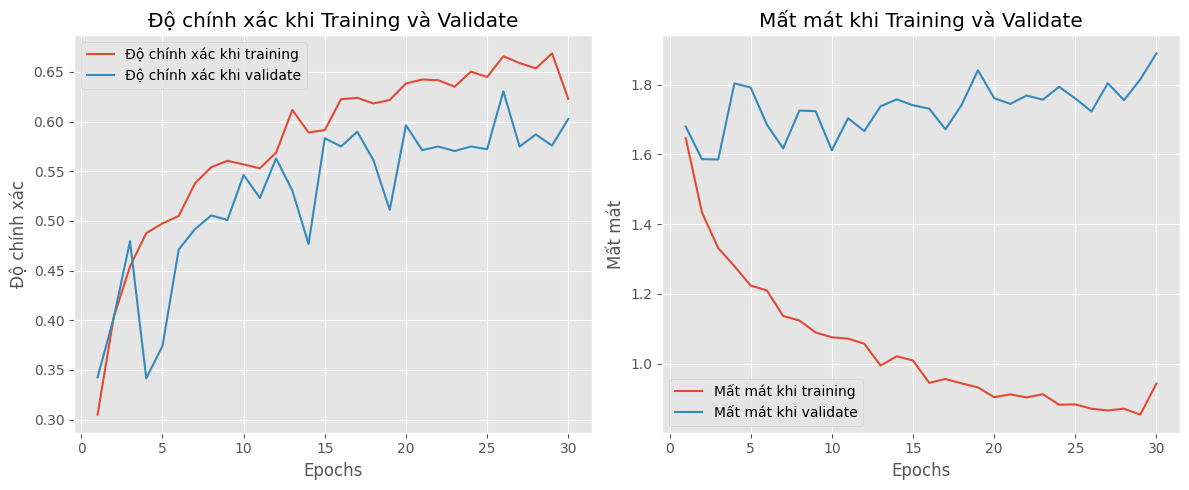

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# In tóm tắt kiến trúc mô hình
print("Model Summary:")
model.summary()

# Trích xuất thông tin từ history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = len(history.history["loss"])
epochs_range = range(1, num_epochs + 1)

# Thiết lập phong cách ggplot
plt.style.use("ggplot")

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))

# Biểu đồ độ chính xác
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Độ chính xác khi training')
plt.plot(epochs_range, val_acc, label='Độ chính xác khi validate')
plt.title('Độ chính xác khi Training và Validate')
plt.xlabel('Epochs')
plt.ylabel('Độ chính xác')
plt.legend()

# Biểu đồ hàm mất mát
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Mất mát khi training')
plt.plot(epochs_range, val_loss, label='Mất mát khi validate')
plt.title('Mất mát khi Training và Validate')
plt.xlabel('Epochs')
plt.ylabel('Mất mát')
plt.legend()

# Đảm bảo bố cục gọn gàng và hiển thị biểu đồ
plt.tight_layout()
plt.show()